In [1]:
from IPython.display import Image
import ee
import shapefile
import numpy as np
ee.Initialize()

In [2]:
#x1=82.00
#y1=16.00
#x2=96.00
#y2=26.00
x1=88.993755
y1=22.481707
x2=89.874084
y2=21.720598
polygon1 = [[x1,y1],[x2,y1],[x2,y2],[x1,y2],[x1,y1]]
bd=[[26.595400,88.401549],[25.814693,88.115625],[25.292865,89.014446],[24.674865,88.041039],[21.685379,89.094864],[21.295222,92.640797],[23.690003,92.265045],[22.945747,91.575422],[23.944494,91.213806],[25.009897,92.385592],[25.253268,89.859716],[26.155146,89.739029]]

#poly1=ee.Geometry.Polygon(polygon1)
#feat1=ee.FeatureCollection(poly1)
sf = shapefile.Reader("BGD_adm/BGD_adm0.shp")
shape_ex=sf.shapes()[0]
lon_lat = []
n=len(shape_ex.points)
print(len(sf.shapes()),n)
i=0
for ip in range(n):
    #i=i+1
    #if i==100:
        i=0
        lon_lat.append([shape_ex.points[ip][0],shape_ex.points[ip][1]])
#lon_lat[-1]=lon_lat[0]
#print(len(lon_lat))
#point = {'type':'Point', 'coordinates':[88.7265054,22.0181325]};
point = [92.2919521,20.6058352]
polygon=polygon1
#f=open('data.csv','w')
#for l in lon_lat:
    #f.write(str(l[0])+','+str(l[1]))
    #f.write('\n')
#f.close()
geo=ee.Geometry.Polygon(polygon)
#geo=ee.Geometry.Point(point)
feat=ee.FeatureCollection(geo)
#print(lon_lat)

1 162263


In [3]:
import pandas as pd
# Input data
#area_of_interest = ee.FeatureCollection('ft:1ihcmnTQF2dUYTKXOIYYwYlJzFLSpO7zsIxg0Yqd5')
#mexico_landcover_2010_landsat = ee.Image("LANDSAT/LE07/C01/T1").clip(area_of_interest)
#
#MODIS/051/MCD12Q1
#MODIS/006/MCD15A3H
#data='MODIS/006/MCD15A3H'
data='MODIS/006/MOD13Q1'

landsat8_collection = ee.ImageCollection(data)#('LANDSAT/LC8_L1T_TOA')
landsat8_collection_dt=landsat8_collection.filterDate('2005-01-01', '2019-01-01')
      
final_coll=landsat8_collection_dt
lst_img=final_coll.toList(final_coll.size())
images=[]

n=(final_coll.size().getInfo())
#image2 = image1.select(['Land_Cover_Type_1'])
print(n)

320


In [4]:
#image1=ee.Image(lst_img.get(0))
#image2=ee.Image(lst_img.get(1))
#img=ee.Image.add(image1,image2)
#img=ee.Image.divide(img,2)

In [4]:
root='sb_modis_NDVI_2005_18/'

In [7]:
names=[]
for i in range(n):
        image=ee.Image(lst_img.get(i))
        images.append(image)
        inf=images[i].getInfo()
        id_img=inf['id']
        name=id_img.split('/')[-1]
        names.append(name)
        print(name)
print(names[:])

2005_01_01
2005_01_17
2005_02_02
2005_02_18
2005_03_06
2005_03_22
2005_04_07
2005_04_23
2005_05_09
2005_05_25
2005_06_10
2005_06_26
2005_07_12
2005_07_28
2005_08_13
2005_08_29
2005_09_14
2005_09_30
2005_10_16
2005_11_01
2005_11_17
2005_12_03
2005_12_19
2006_01_01
2006_01_17
2006_02_02
2006_02_18
2006_03_06
2006_03_22
2006_04_07
2006_04_23
2006_05_09
2006_05_25
2006_06_10
2006_06_26
2006_07_12
2006_07_28
2006_08_13
2006_08_29
2006_09_14
2006_09_30
2006_10_16
2006_11_01
2006_11_17
2006_12_03
2006_12_19
2007_01_01
2007_01_17
2007_02_02
2007_02_18
2007_03_06
2007_03_22
2007_04_07
2007_04_23
2007_05_09
2007_05_25
2007_06_10
2007_06_26
2007_07_12
2007_07_28
2007_08_13
2007_08_29
2007_09_14
2007_09_30
2007_10_16
2007_11_01
2007_11_17
2007_12_03
2007_12_19
2008_01_01
2008_01_17
2008_02_02
2008_02_18
2008_03_05
2008_03_21
2008_04_06
2008_04_22
2008_05_08
2008_05_24
2008_06_09
2008_06_25
2008_07_11
2008_07_27
2008_08_12
2008_08_28
2008_09_13
2008_09_29
2008_10_15
2008_10_31
2008_11_16
2008_12_02

In [8]:
f=open(root+'names.csv','w')
for name in names:   
    f.write(name)
    f.write('\n')
f.close()

In [9]:
import pickle

pickle_out = open("images.pickle","wb")
pickle.dump(images, pickle_out)
pickle_out.close()

pickle_out = open("names.pickle","wb")
pickle.dump(names, pickle_out)
pickle_out.close()




In [4]:
from IPython.display import Image
import ee
import shapefile
import numpy as np
ee.Initialize()
import pickle
pickle_out = open("names.pickle","rb")
names=pickle.load(pickle_out)
pickle_out.close()
pickle_out = open("images.pickle","rb")
images=pickle.load(pickle_out)
pickle_out.close()
n=len(names)
print(n)

320


In [5]:
im=images[0]#.clip(feat)
inf=im.getInfo()
print(inf['properties']['system:footprint']['coordinates'])

[[-180.0, -90.0], [180.0, -90.0], [180.0, 90.0], [-180.0, 90.0], [-180.0, -90.0]]


In [6]:
#date=name.split('_')[-1]
#year=date[:4]
#month=date[4:6]
#day=date[6:]
#print(name,year,month,day)
#print(inf.keys())
#print(inf['version'])-

In [11]:
print(root)

sb_modis_NDVI_2005_18/


In [10]:
import requests,urllib
for i in range(80,n):
    image_a=images[i]
    #tct = tasseled_cap_transformation(images[i])
    #tct_g=tct.select('greenness')
    image = image_a.clip(feat)
    path = image.getDownloadUrl({
        'scale': 250,
        'crs': 'EPSG:4326',#WGS84
        'region':polygon
        })
    print(i)
    res=urllib.request.urlopen(path)
    f=open(root+str(i)+'.zip','wb')
    f.write(res.read())
    f.close()
#request = urllib2.Request(self.url)
#pic = urllib2.urlopen(request)



80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


In [12]:
import zipfile
for i in range(n):
    print(i)
    with zipfile.ZipFile(root+str(i)+'.zip', 'r') as zip_ref:
        zip_ref.extractall(root)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
import csv
f=open(root+'names.csv','r')
lines =f.read()
names=lines.split('\n')
f.close()
print(len(names))

320


In [38]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np


In [67]:
qcs=[]
qc_names=[]
for name in names:
    if len(name)==0:
        break
    _name=name#+'.Nadir_Reflectance'
    blue=Image.open(root+_name+'.NDVI.tif')
    blue=np.array(blue,dtype=np.int16)
    green=Image.open(root+_name+'.EVI.tif')
    green=np.array(green,dtype=np.int16)
    red=Image.open(root+_name+'.NDVI.tif')
    red=np.array(red,dtype=np.int16)
    #blue=blue*0
    sp=blue.shape
    #mask=np.ones((sp[0],sp[1]),dtype=np.uint8)
    #mask=mask*24
    #qc=np.bitwise_and(red,mask)
    qc_val=np.mean(red)
    print(qc_val)
    
    
    dt=name.split('_')
    month=dt[1]
    if int(month)!=11 and int(month)!=12 and int(month)!=1 and int(month)!=2:
        continue
    qcs.append(qc_val)
    qc_names.append(name)
    img=np.zeros((sp[0],sp[1],3),dtype=np.uint8)
    red=red*0
    #blue=blue*0
    red[green<0]=0
    blue[green<0]=0
    green[green<0]=0
    red[green>10000]=0
    blue[green>10000]=0
    green[green>10000]=0
    
    
    img[:,:,0]=np.uint8(blue)
    img[:,:,1]=np.uint8(green*2.5)
    img[:,:,2]=np.uint8(red)
    img[img<-500]=0
    #img=np.uint8(img*255)
    #plt.imshow(img)
    #plt.show()
    cv2.imwrite(root+'img/'+name+'.jpg',img)
    print(name,names.index(name))
    print(np.max(img))
    print(np.shape(img))
    
#print('mean_qc',np.mean(qcs))

3950.64754528
2005_01_01 0
255
(340, 393, 3)
4023.00941476
2005_01_17 1
255
(340, 393, 3)
3831.77230953
2005_02_02 2
255
(340, 393, 3)
3852.55898818
2005_02_18 3
255
(340, 393, 3)
4015.56653196
3692.99264332
3583.12025146
3330.49900464
2677.24449184
3037.31636731
2337.20095794
2471.22391858
3014.28215836
2371.78015267
1753.38565335
3903.83883401
3833.38955246
4555.23262236
4271.77755576
4550.05466996
2005_11_01 19
255
(340, 393, 3)
4356.68500973
2005_11_17 20
255
(340, 393, 3)
4427.19097441
2005_12_03 21
255
(340, 393, 3)
4143.41118096
2006_01_01 22
255
(340, 393, 3)
3936.31277503
2006_01_17 23
255
(340, 393, 3)
3595.62147882
2006_02_02 24
255
(340, 393, 3)
3667.89235144
2006_02_18 25
255
(340, 393, 3)
4034.22163598
3723.55148181
3671.43881904
3426.23286185
3362.449768
1674.91889687
2461.5780946
2281.47137405
1872.37689717
2828.14807664
2145.85918276
3160.5095794
3885.55395899
3840.04270319
4603.96606795
4613.88244275
2006_11_01 41
255
(340, 393, 3)
4490.53432121
2006_11_17 42
255
(340

In [68]:
print(len(qc_names))

106


In [69]:
import datetime
images=[]
values=[]
times=[]
for name in qc_names:
    if len(name)==0:
        break
    image=cv2.imread(root+'img/'+name+'.jpg')
    img=image[:,:,1]
    val=np.mean(img)
    values.append(val)
    images.append(image)
    dt=name.split('_')
    time=datetime.datetime(int(dt[0]),int(dt[1]),int(dt[2]))
    times.append(time)
    print(time)
#print(values)
print(len(images))
x=range(len(images))


2005-01-01 00:00:00
2005-01-17 00:00:00
2005-02-02 00:00:00
2005-02-18 00:00:00
2005-11-01 00:00:00
2005-11-17 00:00:00
2005-12-03 00:00:00
2006-01-01 00:00:00
2006-01-17 00:00:00
2006-02-02 00:00:00
2006-02-18 00:00:00
2006-11-01 00:00:00
2006-11-17 00:00:00
2006-12-03 00:00:00
2006-12-19 00:00:00
2007-01-01 00:00:00
2007-01-17 00:00:00
2007-02-02 00:00:00
2007-02-18 00:00:00
2007-11-01 00:00:00
2007-11-17 00:00:00
2007-12-03 00:00:00
2007-12-19 00:00:00
2008-01-01 00:00:00
2008-01-17 00:00:00
2008-02-02 00:00:00
2008-02-18 00:00:00
2008-11-16 00:00:00
2008-12-02 00:00:00
2008-12-18 00:00:00
2009-01-01 00:00:00
2009-01-17 00:00:00
2009-02-02 00:00:00
2009-02-18 00:00:00
2009-11-01 00:00:00
2009-11-17 00:00:00
2009-12-03 00:00:00
2009-12-19 00:00:00
2010-01-01 00:00:00
2010-01-17 00:00:00
2010-02-02 00:00:00
2010-02-18 00:00:00
2010-11-01 00:00:00
2010-11-17 00:00:00
2010-12-03 00:00:00
2010-12-19 00:00:00
2011-01-01 00:00:00
2011-01-17 00:00:00
2011-02-02 00:00:00
2011-02-18 00:00:00


In [70]:
import pickle
import pandas as pd
df=pd.DataFrame(values)
pickle_out = open(root+'df_mean_NDVI.pickle',"wb")
pickle.dump(df, pickle_out)
pickle_out.close()


In [71]:
import pickle
import pandas as pd
pickle_out = open(root+'df_mean_NDVI.pickle',"rb")
df=pickle.load(pickle_out)
pickle_out.close()

106


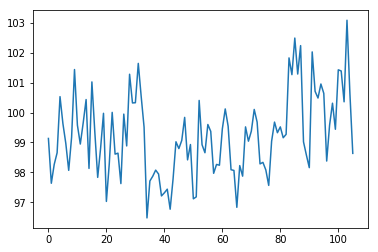

In [73]:
#df['qc']=qc_names
df['EVI']=qcs
df[0].plot()
#print(df[:])
print(len(df))

In [ ]:
#Define classification function
def classification(raster_input, training_dataset,number_of_training_points, region, classification_algorithm):
    bands = raster_input.bandNames()
    points = ee.FeatureCollection.randomPoints(region, number_of_training_points, number_of_training_points, 1)
    training = training_dataset.addBands(raster_input).reduceToVectors(
        reducer="mean",
        geometry=points,
        geometryType="centroid",
        scale=30, 
        crs="EPSG:4326"
    )

    classifier = training.trainClassifier(
        property_list=bands,
        class_property="label",
        classifier_name=classification_algorithm
    )
    # Apply the classifier to the original composite.
    out = raster_input.classify(classifier)
    return out